<a href="https://colab.research.google.com/github/nowkoai/nlplot0228/blob/main/nlplot0228.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ①Twitterで指定キーワードの検索結果を収集

In [2]:
import tweepy
import pandas as pd
import datetime

In [3]:
###########################################################
# TwitterのAPIキー
# CONSUMER_KEY="CONSUMER_KEYを入力"
# CONSUMER_SECRET="CONSUMER_SECRETを入力"
# ACCESS_TOKEN="ACCESS_TOKENを入力"
# ACCESS_SECRET="ACCESS_SECERETを入力"
###########################################################

In [4]:
# Twitter APIインスタンス作成
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
api = tweepy.API(auth, wait_on_rate_limit = True)

In [5]:
# Twitterの検索キーワード（リツィート、リプライを除く）
q = f"自民党 exclude:retweets -filter:replies"

In [6]:
# Tweetデータを格納するリスト
tweet_data = []

# Tweetデータの取得（ID/ユーザー名/★Tweerデータ/Text/いいね数/リツィート数）
for tweet in tweepy.Cursor(api.search, q=q, result_type='recent',locale="ja",lang="ja",include_entities=False,count=500).items(500):
    tweet_data.append([tweet.id_str,
                       tweet.user.screen_name,
                       tweet.created_at+datetime.timedelta(hours=9),
                       tweet.text.replace('\n',''),
                       tweet.favorite_count,
                       tweet.retweet_count])

In [7]:
# カラムを280文字幅に設定
pd.set_option("display.max_colwidth", 280)

In [8]:
# データ列名
columns_name=["TW_NO","USER_NAME","TW_TIME","TW_TEXT","FAV","RT"]
#データフレーム化
df=pd.DataFrame(tweet_data,columns=columns_name)

In [9]:
df

,TW_NO,USER_NAME,TW_TIME,TW_TEXT,FAV,RT
0,1497992587386691589,NMStatakiage,2022-02-28 02:50:38,1次産業で自民党政権になってから生活が一気に苦しくなった地方の一部が自民党から抜け出そうとし始めたそれを邪魔するのはどこかなんと都市部の自民党支持企業、団体自民党議員をのさばらせなければ成り立たない企業ならなくていい少しずつでいい日本をよくしよう,0,0
1,1497992169805983745,tgmdt852,2022-02-28 02:48:59,憲法9条をご神体に祀る、老人たち。いまだに生き延びてる。綺麗事では平和を守れない。ドイツでさえ防衛費を13兆円に、GDP3%に増やす事を決めた。日本は5兆円で大丈夫か？生活を破壊するのは侵略だぞ、わかってる？#平野啓一郎… https://t.co/v5pj3v3CBt,0,0
2,1497991557110067200,UO66sxlVmbzYuWE,2022-02-28 02:46:33,ウクライナでわかったよね？日本国民の皆さん。日米地位協定なんて不公平な協定はもう見直せよ自民党。安保も本気で日本人なんかは守らんよアメリカわ。それでもアメリカを信用する？,1,1
3,1497989614157459459,swiccco,2022-02-28 02:38:49,「自民党を非難するならお前が政治家になって変えればいいだろ」みたいなやつって橋下徹レベルでも言うんだ もしかして最初から言ってた？,0,0
4,1497989572332232705,resistancecat,2022-02-28 02:38:40,壁透過レーダーは現状、誰でも買える。購入や使用を登録制にするとか規制を設けなさい。＃自民党 ＃松本文明https://t.co/wCyM3X1lIJ,0,0
...,...,...,...,...,...,...
495,1497929054842134529,YUGAYUG01511120,2022-02-27 22:38:11,橋下さん、知事時代に国政に口出ししてる頃から、この人に外交は、国防は任せられないと、しみじみ思ったものだけど…大阪から一歩出た主張は、とたんにダメダメになるよね…まぁ、大阪での主張も、地元の人にけっこう嫌われてるけど、結局、大阪… https://t.co/g4reeRyeqi,2,0
496,1497929052023189505,quietmurakami,2022-02-27 22:38:10,自民党の政治が日本の国土を破壊する。日本の建設業は外国人頼みになっている。外国人にすら見捨てられかけている。澤田晃宏さん。一月万冊清水有高 https://t.co/wlBzX4AO5k @YouTubeより,0,0
497,1497928977834520592,Aa123451ZZ,2022-02-27 22:37:53,《実名・新証言》「選挙の金だと、もちろん認識していました」自民党京都府連マネロン買収疑惑(文春オンライン) https://t.co/cOuAqK3CAe,0,0
498,1497928974328295425,nogawam,2022-02-27 22:37:52,《実名・新証言》「選挙の金だと、もちろん認識していました」自民党京都府連マネロン買収疑惑 #自民党京都府連 #文春オンライン https://t.co/KbZH0yZdOt,22,29


## ② Twitterデータの前処理

In [10]:
!pip install emoji

In [11]:
# 絵文字を削除
import emoji

def remove_emoji(text):
    return emoji.get_emoji_regexp().sub(u'', text)


# ツイートを整形する（不要な文字を削除する！）
# 形態素解析する前に、必要に応じて追記
def format_df_text(text_col,df):
    df['temp'] = df[text_col].replace(r'https?://[w/:%#$&?()~.=+-…]+', '', regex=True) #画像へのリンクを削除
    df['temp'] = df['temp'].replace(r'@[w/:%#$&?()~.=+-…]+', '', regex=True) #'@'によるメンションを削除
    df['temp'] = df['temp'].replace(r'#(\w+)', '', regex=True) #ハッシュタグ(半角)を削除
    df['temp'] = df['temp'].replace(r'＃(\w+)', '', regex=True) #ハッシュタグ(全角)を削除
    df['temp'] = df['temp'].apply(lambda x: remove_emoji(x)) #🐶のような絵文字を削除
    
    return df['temp']

In [12]:
# Tweetデータの前処理
df['TW_TEXT_mod'] = format_df_text('TW_TEXT',df)

In [13]:
df

,TW_NO,USER_NAME,TW_TIME,TW_TEXT,FAV,RT,temp,TW_TEXT_mod
0,1497992587386691589,NMStatakiage,2022-02-28 02:50:38,1次産業で自民党政権になってから生活が一気に苦しくなった地方の一部が自民党から抜け出そうとし始めたそれを邪魔するのはどこかなんと都市部の自民党支持企業、団体自民党議員をのさばらせなければ成り立たない企業ならなくていい少しずつでいい日本をよくしよう,0,0,1次産業で自民党政権になってから生活が一気に苦しくなった地方の一部が自民党から抜け出そうとし始めたそれを邪魔するのはどこかなんと都市部の自民党支持企業、団体自民党議員をのさばらせなければ成り立たない企業ならなくていい少しずつでいい日本をよくしよう,1次産業で自民党政権になってから生活が一気に苦しくなった地方の一部が自民党から抜け出そうとし始めたそれを邪魔するのはどこかなんと都市部の自民党支持企業、団体自民党議員をのさばらせなければ成り立たない企業ならなくていい少しずつでいい日本をよくしよう
1,1497992169805983745,tgmdt852,2022-02-28 02:48:59,憲法9条をご神体に祀る、老人たち。いまだに生き延びてる。綺麗事では平和を守れない。ドイツでさえ防衛費を13兆円に、GDP3%に増やす事を決めた。日本は5兆円で大丈夫か？生活を破壊するのは侵略だぞ、わかってる？#平野啓一郎… https://t.co/v5pj3v3CBt,0,0,憲法9条をご神体に祀る、老人たち。いまだに生き延びてる。綺麗事では平和を守れない。ドイツでさえ防衛費を13兆円に、GDP3%に増やす事を決めた。日本は5兆円で大丈夫か？生活を破壊するのは侵略だぞ、わかってる？…,憲法9条をご神体に祀る、老人たち。いまだに生き延びてる。綺麗事では平和を守れない。ドイツでさえ防衛費を13兆円に、GDP3%に増やす事を決めた。日本は5兆円で大丈夫か？生活を破壊するのは侵略だぞ、わかってる？…
2,1497991557110067200,UO66sxlVmbzYuWE,2022-02-28 02:46:33,ウクライナでわかったよね？日本国民の皆さん。日米地位協定なんて不公平な協定はもう見直せよ自民党。安保も本気で日本人なんかは守らんよアメリカわ。それでもアメリカを信用する？,1,1,ウクライナでわかったよね？日本国民の皆さん。日米地位協定なんて不公平な協定はもう見直せよ自民党。安保も本気で日本人なんかは守らんよアメリカわ。それでもアメリカを信用する？,ウクライナでわかったよね？日本国民の皆さん。日米地位協定なんて不公平な協定はもう見直せよ自民党。安保も本気で日本人なんかは守らんよアメリカわ。それでもアメリカを信用する？
3,1497989614157459459,swiccco,2022-02-28 02:38:49,「自民党を非難するならお前が政治家になって変えればいいだろ」みたいなやつって橋下徹レベルでも言うんだ もしかして最初から言ってた？,0,0,「自民党を非難するならお前が政治家になって変えればいいだろ」みたいなやつって橋下徹レベルでも言うんだ もしかして最初から言ってた？,「自民党を非難するならお前が政治家になって変えればいいだろ」みたいなやつって橋下徹レベルでも言うんだ もしかして最初から言ってた？
4,1497989572332232705,resistancecat,2022-02-28 02:38:40,壁透過レーダーは現状、誰でも買える。購入や使用を登録制にするとか規制を設けなさい。＃自民党 ＃松本文明https://t.co/wCyM3X1lIJ,0,0,壁透過レーダーは現状、誰でも買える。購入や使用を登録制にするとか規制を設けなさい。,壁透過レーダーは現状、誰でも買える。購入や使用を登録制にするとか規制を設けなさい。
...,...,...,...,...,...,...,...,...
495,1497929054842134529,YUGAYUG01511120,2022-02-27 22:38:11,橋下さん、知事時代に国政に口出ししてる頃から、この人に外交は、国防は任せられないと、しみじみ思ったものだけど…大阪から一歩出た主張は、とたんにダメダメになるよね…まぁ、大阪での主張も、地元の人にけっこう嫌われてるけど、結局、大阪… https://t.co/g4reeRyeqi,2,0,橋下さん、知事時代に国政に口出ししてる頃から、この人に外交は、国防は任せられないと、しみじみ思ったものだけど…大阪から一歩出た主張は、とたんにダメダメになるよね…まぁ、大阪での主張も、地元の人にけっこう嫌われてるけど、結局、大阪…,橋下さん、知事時代に国政に口出ししてる頃から、この人に外交は、国防は任せられないと、しみじみ思ったものだけど…大阪から一歩出た主張は、とたんにダメダメになるよね…まぁ、大阪での主張も、地元の人にけっこう嫌われてるけど、結局、大阪…
496,1497929052023189505,quietmurakami,2022-02-27 22:38:10,自民党の政治が日本の国土を破壊する。日本の建設業は外国人頼みになっている。外国人にすら見捨てられかけている。澤田晃宏さん。一月万冊清水有高 https://t.co/wlBzX4AO5k @YouTubeより,0,0,自民党の政治が日本の国土を破壊する。日本の建設業は外国人頼みになっている。外国人にすら見捨てられかけている。澤田晃宏さん。一月万冊清水有高 より,自民党の政治が日本の国土を破壊する。日本の建設業は外国人頼みになっている。外国人にすら見捨てられかけている。澤田晃宏さん。一月万冊清水有高 より
497,1497928977834520592,Aa123451ZZ,2022-02-27 22:37:53,《実名・新証言》「選挙の金だと、もちろん認識していました」自民党京都府連マネロン買収疑惑(文春オンライン) https://t.co/cOuAqK3CAe,0,0,《実名・新証言》「選挙の金だと、もちろん認識していました」自民党京都府連マネロン買収疑惑(文春オンライン),《実名・新証言》「選挙の金だと、もちろん認識していました」自民党京都府連マネロン買収疑惑(文春オンライン)
498,1497928974328295425,nogawam,2022-02-27 22:37:52,《実名・新証言》「選挙の金だと、もちろん認識していました」自民党京都府連マネロン買収疑惑 #自民党京都府連 #文春オンライン https://t.co/KbZH0yZdOt,22,29,《実名・新証言》「選挙の金だと、もちろん認識していました」自民党京都府連マネロン買収疑惑,《実名・新証言》「選挙の金だと、もちろん認識していました」自民党京都府連マネロン買収疑惑


### ③ TwitterデータをGoogle Drive上に保存する

In [14]:
file_name='tw_all.csv'

# Twitter全情報をCSV保存
# df.to_csv(file_name,encoding='utf-8-sig',index=False)
df.to_csv(file_name,encoding='utf-8',index=False)

In [20]:
# ファイル保存じた現在パスを表示
%pwd

'/content'

In [21]:
# 保存ファイル名を確認 --> ★Googleドライブでファイルの中身をご確認ください！
%ls

mecab-ipadic-neologd/  sample_data/  tw_all.csv  tw_text_mod.csv


In [22]:
# !cat tw_text_mod.csv

## ④ Twitterデータを形態素解析/Mecab

In [23]:
# 形態素分析ライブラリーMeCab と 辞書(mecab-ipadic-NEologd)のインストール 
!apt-get -q -y install sudo file mecab libmecab-dev mecab-ipadic-utf8 git curl python-mecab > /dev/null
!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git > /dev/null 
!echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n > /dev/null 2>&1
!pip install mecab-python3 > /dev/null

# シンボリックリンクによるエラー回避
!ln -s /etc/mecabrc /usr/local/etc/mecabrc

fatal: destination path 'mecab-ipadic-neologd' already exists and is not an empty directory.
ln: failed to create symbolic link '/usr/local/etc/mecabrc': File exists


In [24]:
# 辞書のパスの確認
!echo `mecab-config --dicdir`"/mecab-ipadic-neologd"

/usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd


In [25]:
import MeCab

# Mecabの動作確認（--> 形態素解析/分かち書き確認）
# Neologd新語辞書で、「鬼滅の刃」が認識されてる！
m = MeCab.Tagger('-d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd')
sample_txt = "鬼滅の刃をみながら、私はPythonでプログラミングをします"
print("Mecab:\n", m.parse(sample_txt))

Mecab:
 鬼滅の刃	名詞,固有名詞,一般,*,*,*,鬼滅の刃,キメツノヤイバ,キメツノヤイバ
を	助詞,格助詞,一般,*,*,*,を,ヲ,ヲ
み	動詞,自立,*,*,一段,連用形,みる,ミ,ミ
ながら	助詞,接続助詞,*,*,*,*,ながら,ナガラ,ナガラ
、	記号,読点,*,*,*,*,、,、,、
私	名詞,代名詞,一般,*,*,*,私,ワタシ,ワタシ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
Python	名詞,固有名詞,一般,*,*,*,Python,パイソン,パイソン
で	助詞,格助詞,一般,*,*,*,で,デ,デ
プログラミング	名詞,サ変接続,*,*,*,*,プログラミング,プログラミング,プログラミング
を	助詞,格助詞,一般,*,*,*,を,ヲ,ヲ
し	動詞,自立,*,*,サ変・スル,連用形,する,シ,シ
ます	助動詞,*,*,*,特殊・マス,基本形,ます,マス,マス
EOS



In [26]:
# 保存ファイル名を確認 --> ★Googleドライブでファイルの中身をご確認ください！
%ls

mecab-ipadic-neologd/  sample_data/  tw_all.csv  tw_text_mod.csv


In [27]:
# CSVファイル読み込み（Twitterテキストデータを読み込み！）
df_tw = pd.read_csv("tw_all.csv")

In [28]:
# Pandasをリスト化
tw_data = df_tw['TW_TEXT_mod'].to_list()

In [30]:
# Mecabで形態素解析する文書の確認
# tw_data

In [31]:
# Mecabを使用して、形態素解析
# 形態素解析器: ChaSen、辞書: 新語対応で有名なNeologd
# mecab = MeCab.Tagger("-Ochasen")
mecab =MeCab.Tagger('-Ochasen -d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd')

In [32]:
# 文単位の名詞リスト
words_list=[]

# 文単位の名詞リストを生成
for sentence in tw_data:
    # print(mecab.parse(str(sentence)))
    # print(mecab.parse(str(sentence)).splitlines())

    sw_list = []
    for v in mecab.parse(str(sentence)).splitlines():
        # print(v)
        # print(v.split())
        if (len(v.split())>=3 and v.split()[3][:2]=='名詞'):
            sw_list.append(v.split()[2])
            # print(sw_list)
            
    words_list.append(sw_list)

In [33]:
# 形態素解析の結果として、取得した「文単位の名詞リスト」を確認
print(words_list)

[['1次', '産業', '自民党政権', '生活', '地方', '一部', '自民党', 'それ', '邪魔', 'の', 'どこか', '都市部', '自民党支持', '企業', '団体', '自民党', '議員', '企業', '日本', 'しよう'], ['憲法9条', '神体', '老人', 'たち', '綺麗事', '平和', 'ドイツ', '防衛費', '13兆円', 'GDP', '3%', '事', '日本', '5兆円', '大丈夫', '生活', '破壊', 'の', '侵略'], ['ウクライナ', '日本国民', '皆さん', '日米地位協定', '不公平', '協定', '自民党', '安保', '本気', '日本人', 'アメリカ', 'アメリカ', '信用'], ['自民党', '非難', 'お前', '政治家', 'みたい', 'やつ', '橋下徹', 'レベル', 'ん', '最初'], ['壁', '透過', 'レーダー', '現状', '誰', '購入', '使用', '登録制', '規制'], ['居間', '麻生派', '一斉', '退会', '波紋', '背景', '麻生氏', '遺恨', '菅', '氏', '期待', 'TBS', '系', 'JNN', '佐藤', '馬鹿', '麻生', '馬鹿'], ['日本', '他国', 'よう', '憲法改正', 'しよう', '100%', '無理', '緊縮', 'ん', '自民党', '改正', '草案', '中', '財政', '規律', '条項', 'の', '説明', '緊縮', '憲法改正', '防衛力', '一瞬'], ['維新の会', 'ヒトラー', '発言', 'の', '国土交通省', '統計', '不正', '問題', '自民党', 'オーダー', 'ん', 'ん'], ['ベルリン', 'プラハ', 'ロシア', '蹂躙', '東欧', '東ドイツ', 'ウクライナ', '連帯', '欧州', '理解', '日本人', '左翼', '保守', '中', '岩場', '老害'], ['自民党', 'ネット工作員', '話題', 'ネット', '時代', '選挙', 'さ', 'なん'], ['自民党', 'ネット工作員', '話題', 'ネット'

In [34]:
# 「文単位の名詞リスト」の平坦化
words_list_flat = []

for u in words_list:
    words_list_flat.extend(u)

In [35]:
print(words_list_flat)

['1次', '産業', '自民党政権', '生活', '地方', '一部', '自民党', 'それ', '邪魔', 'の', 'どこか', '都市部', '自民党支持', '企業', '団体', '自民党', '議員', '企業', '日本', 'しよう', '憲法9条', '神体', '老人', 'たち', '綺麗事', '平和', 'ドイツ', '防衛費', '13兆円', 'GDP', '3%', '事', '日本', '5兆円', '大丈夫', '生活', '破壊', 'の', '侵略', 'ウクライナ', '日本国民', '皆さん', '日米地位協定', '不公平', '協定', '自民党', '安保', '本気', '日本人', 'アメリカ', 'アメリカ', '信用', '自民党', '非難', 'お前', '政治家', 'みたい', 'やつ', '橋下徹', 'レベル', 'ん', '最初', '壁', '透過', 'レーダー', '現状', '誰', '購入', '使用', '登録制', '規制', '居間', '麻生派', '一斉', '退会', '波紋', '背景', '麻生氏', '遺恨', '菅', '氏', '期待', 'TBS', '系', 'JNN', '佐藤', '馬鹿', '麻生', '馬鹿', '日本', '他国', 'よう', '憲法改正', 'しよう', '100%', '無理', '緊縮', 'ん', '自民党', '改正', '草案', '中', '財政', '規律', '条項', 'の', '説明', '緊縮', '憲法改正', '防衛力', '一瞬', '維新の会', 'ヒトラー', '発言', 'の', '国土交通省', '統計', '不正', '問題', '自民党', 'オーダー', 'ん', 'ん', 'ベルリン', 'プラハ', 'ロシア', '蹂躙', '東欧', '東ドイツ', 'ウクライナ', '連帯', '欧州', '理解', '日本人', '左翼', '保守', '中', '岩場', '老害', '自民党', 'ネット工作員', '話題', 'ネット', '時代', '選挙', 'さ', 'なん', '自民党', 'ネット工作員', '話題', 'ネット', '時代', '選挙', 'さ', '7

### ⑤ ワードクラウドの表示

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [37]:
# ワードのリストをスペース区切りで連結
words_text = " ".join(words_list_flat)
words_text

'1次 産業 自民党政権 生活 地方 一部 自民党 それ 邪魔 の どこか 都市部 自民党支持 企業 団体 自民党 議員 企業 日本 しよう 憲法9条 神体 老人 たち 綺麗事 平和 ドイツ 防衛費 13兆円 GDP 3% 事 日本 5兆円 大丈夫 生活 破壊 の 侵略 ウクライナ 日本国民 皆さん 日米地位協定 不公平 協定 自民党 安保 本気 日本人 アメリカ アメリカ 信用 自民党 非難 お前 政治家 みたい やつ 橋下徹 レベル ん 最初 壁 透過 レーダー 現状 誰 購入 使用 登録制 規制 居間 麻生派 一斉 退会 波紋 背景 麻生氏 遺恨 菅 氏 期待 TBS 系 JNN 佐藤 馬鹿 麻生 馬鹿 日本 他国 よう 憲法改正 しよう 100% 無理 緊縮 ん 自民党 改正 草案 中 財政 規律 条項 の 説明 緊縮 憲法改正 防衛力 一瞬 維新の会 ヒトラー 発言 の 国土交通省 統計 不正 問題 自民党 オーダー ん ん ベルリン プラハ ロシア 蹂躙 東欧 東ドイツ ウクライナ 連帯 欧州 理解 日本人 左翼 保守 中 岩場 老害 自民党 ネット工作員 話題 ネット 時代 選挙 さ なん 自民党 ネット工作員 話題 ネット 時代 選挙 さ 70億円 支援要請 日本政府 支援 人道支援 民主党 嫌い 自民党 右派 支持 東京オリンピック 開催 反対派 マスク ワクチン 推奨 派 戦争 どっち 悪意 ウクライナ 肩入れ 僕 みたい の 反米右翼 そう トランプ バイデン トランプ 派 ー 今 通り ノンポリ 今 外務大臣 話 限り 保守派 与党 自民党 党内 辞任要求 議論 今度 冗談 抜き ただ 党 岸田 総理 金 ロシア ウクライナ 平和的 話し合い 自分 仲介 政治家 日本国 総理 総裁 岸田 総理 金 ロシア ウクライナ 平和的 話し合い 自分 仲介 政治家 日本国 総理 総裁 憲法9条 改正 威勢 こと 自民党 政治家 自衛隊 前線 奴 橋下 氏 解説 PCR検査 意味 威勢 こと PCR検査 奴 解説 石破 氏 ニュークリア・シェアリング 議論 自民党 石破茂 防衛 相 2017年 発言 安倍元首相 登板 麻生 蔵相 菅 官房長官 河野 外相 岸 防衛相 森元首相 伊吹 衆議院議長 国策 顧問 自民党 高市 幹事長 萩生田 政調会長 新藤 総

In [38]:
# 日本語の True Font のインストール
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-18ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


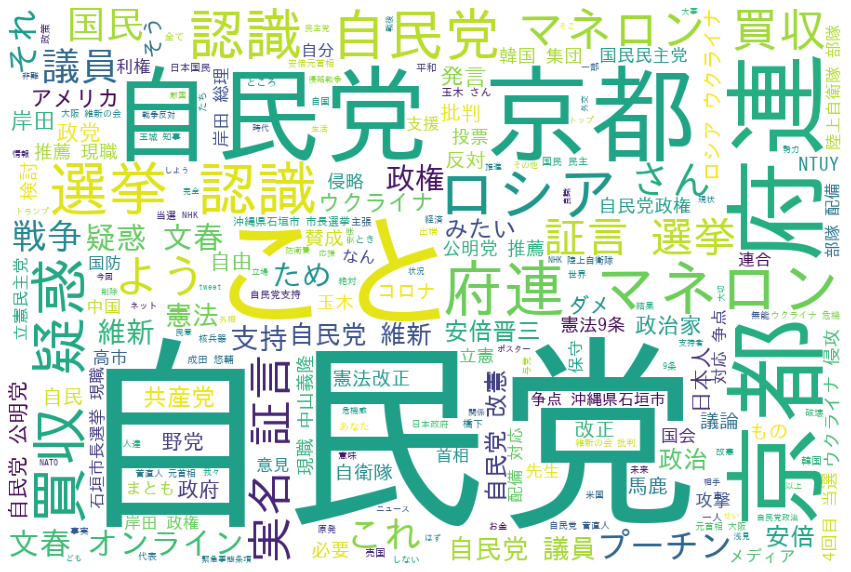

In [40]:
# WordCloudで出力するフォントを指定
font_path = "/usr/share/fonts/truetype/fonts-japanese-gothic.ttf"

# ストップワードの設定　※これは検索キーワードによって除外したほうがいい単語を設定
stop_words = [ 'https','OracleInnovation' ,'Innovation','Oracle','co','the','of','Summit','Tokyo','Japan','RT',u'説明',u'データ',u'する',u'オラクル',u'日本',u'提供',u'開催',u'お客様']

#解析単語の指定、ストップワードの設定、背景色は白
wordcloud = WordCloud(background_color="white", font_path=font_path, stopwords=set(stop_words),width=900,height=600).generate(words_text)

# ワードクラウドを表示
plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### ⑥ ワードカウント（★ストップワードのチェック）

In [41]:
from collections import Counter

In [42]:
# Counterの引数はリストを指定！
print(words_list_flat)

['1次', '産業', '自民党政権', '生活', '地方', '一部', '自民党', 'それ', '邪魔', 'の', 'どこか', '都市部', '自民党支持', '企業', '団体', '自民党', '議員', '企業', '日本', 'しよう', '憲法9条', '神体', '老人', 'たち', '綺麗事', '平和', 'ドイツ', '防衛費', '13兆円', 'GDP', '3%', '事', '日本', '5兆円', '大丈夫', '生活', '破壊', 'の', '侵略', 'ウクライナ', '日本国民', '皆さん', '日米地位協定', '不公平', '協定', '自民党', '安保', '本気', '日本人', 'アメリカ', 'アメリカ', '信用', '自民党', '非難', 'お前', '政治家', 'みたい', 'やつ', '橋下徹', 'レベル', 'ん', '最初', '壁', '透過', 'レーダー', '現状', '誰', '購入', '使用', '登録制', '規制', '居間', '麻生派', '一斉', '退会', '波紋', '背景', '麻生氏', '遺恨', '菅', '氏', '期待', 'TBS', '系', 'JNN', '佐藤', '馬鹿', '麻生', '馬鹿', '日本', '他国', 'よう', '憲法改正', 'しよう', '100%', '無理', '緊縮', 'ん', '自民党', '改正', '草案', '中', '財政', '規律', '条項', 'の', '説明', '緊縮', '憲法改正', '防衛力', '一瞬', '維新の会', 'ヒトラー', '発言', 'の', '国土交通省', '統計', '不正', '問題', '自民党', 'オーダー', 'ん', 'ん', 'ベルリン', 'プラハ', 'ロシア', '蹂躙', '東欧', '東ドイツ', 'ウクライナ', '連帯', '欧州', '理解', '日本人', '左翼', '保守', '中', '岩場', '老害', '自民党', 'ネット工作員', '話題', 'ネット', '時代', '選挙', 'さ', 'なん', '自民党', 'ネット工作員', '話題', 'ネット', '時代', '選挙', 'さ', '7

In [43]:
# 各ワードの出現カウントの数値出力(カンマ区切り)
counter = Counter(words_list_flat)
print(counter)

Counter({'自民党': 465, 'の': 139, '日本': 113, 'ん': 73, 'こと': 70, '選挙': 62, 'ロシア': 55, '議員': 52, '金': 52, 'さん': 52, 'ウクライナ': 47, '京都': 47, '府連': 46, '疑惑': 46, 'マネロン': 45, '認識': 44, '買収': 43, '実名': 41, 'よう': 40, '維新': 40, '証言': 40, '国民': 40, '人': 39, '事': 36, '今': 33, '氏': 31, '岸田': 31, 'これ': 31, '政権': 31, '何': 29, '戦争': 27, '公明党': 27, 'オンライン': 27, 'プーチン': 26, '改憲': 26, 'それ': 25, '文春': 25, '批判': 23, 'ため': 23, '支持': 22, '国': 22, '当選': 21, '政治家': 20, '賛成': 20, '核': 20, '現職': 20, '方': 19, '憲法': 19, '者': 18, '玉木': 18, '政治': 17, '安倍': 17, '韓国': 17, 'みたい': 16, '共産党': 16, '安倍晋三': 16, '発言': 15, '議論': 15, '総理': 15, '配備': 15, '日本人': 14, 'アメリカ': 14, '維新の会': 14, '自分': 14, '票': 14, '推薦': 14, '政党': 14, '侵攻': 14, '為': 14, '時': 14, 'そう': 13, '野党': 13, '政府': 13, '案': 13, '私': 13, '対応': 13, 'ダメ': 13, '投票': 13, '自由': 13, '馬鹿': 12, '改正': 12, '中': 12, '問題': 12, '大阪': 12, '自民': 12, '２': 12, '集団': 12, '的': 12, '反対': 12, '憲法改正': 11, '支援': 11, '自衛隊': 11, 'もの': 11, 'コロナ': 11, '検討': 11, '中山義隆': 11, 'NHK': 11, 'NTUY': 

In [44]:
# 数値を降順にして、ワードの上位ランキングを数値でもみてみる
print(sorted(counter.items(), key=lambda x:x[1], reverse=True))

[('自民党', 465), ('の', 139), ('日本', 113), ('ん', 73), ('こと', 70), ('選挙', 62), ('ロシア', 55), ('議員', 52), ('金', 52), ('さん', 52), ('ウクライナ', 47), ('京都', 47), ('府連', 46), ('疑惑', 46), ('マネロン', 45), ('認識', 44), ('買収', 43), ('実名', 41), ('よう', 40), ('維新', 40), ('証言', 40), ('国民', 40), ('人', 39), ('事', 36), ('今', 33), ('氏', 31), ('岸田', 31), ('これ', 31), ('政権', 31), ('何', 29), ('戦争', 27), ('公明党', 27), ('オンライン', 27), ('プーチン', 26), ('改憲', 26), ('それ', 25), ('文春', 25), ('批判', 23), ('ため', 23), ('支持', 22), ('国', 22), ('当選', 21), ('政治家', 20), ('賛成', 20), ('核', 20), ('現職', 20), ('方', 19), ('憲法', 19), ('者', 18), ('玉木', 18), ('政治', 17), ('安倍', 17), ('韓国', 17), ('みたい', 16), ('共産党', 16), ('安倍晋三', 16), ('発言', 15), ('議論', 15), ('総理', 15), ('配備', 15), ('日本人', 14), ('アメリカ', 14), ('維新の会', 14), ('自分', 14), ('票', 14), ('推薦', 14), ('政党', 14), ('侵攻', 14), ('為', 14), ('時', 14), ('そう', 13), ('野党', 13), ('政府', 13), ('案', 13), ('私', 13), ('対応', 13), ('ダメ', 13), ('投票', 13), ('自由', 13), ('馬鹿', 12), ('改正', 12), ('中', 12), ('問題', 

In [45]:
# 適さない単語をリストからカット（NGワードの駆逐）
words_list_flat2 = []
for w in words_list_flat:
    if w not in ['の', 'こと', 'ん', 'これ', 'さん', 'よう', '方', '今', '者', '何', 'ため', '氏', 'それ', '時', '的', 'もの', '中', '為', '内', 'みたい', 'そう', '１', '2', '3', '4', '5', '6', '7', '8', '9', '0', 'ら', '等', 'たち', 'さ', 'そこ']:
        words_list_flat2.append(w)

In [46]:
# 各ワードの出現カウントの数値出力(カンマ区切り)
#--> NGワードの駆逐後
counter2 = Counter(words_list_flat2)
print(sorted(counter2.items(), key=lambda x:x[1], reverse=True))

[('自民党', 465), ('日本', 113), ('選挙', 62), ('ロシア', 55), ('議員', 52), ('金', 52), ('ウクライナ', 47), ('京都', 47), ('府連', 46), ('疑惑', 46), ('マネロン', 45), ('認識', 44), ('買収', 43), ('実名', 41), ('維新', 40), ('証言', 40), ('国民', 40), ('人', 39), ('事', 36), ('岸田', 31), ('政権', 31), ('戦争', 27), ('公明党', 27), ('オンライン', 27), ('プーチン', 26), ('改憲', 26), ('文春', 25), ('批判', 23), ('支持', 22), ('国', 22), ('当選', 21), ('政治家', 20), ('賛成', 20), ('核', 20), ('現職', 20), ('憲法', 19), ('玉木', 18), ('政治', 17), ('安倍', 17), ('韓国', 17), ('共産党', 16), ('安倍晋三', 16), ('発言', 15), ('議論', 15), ('総理', 15), ('配備', 15), ('日本人', 14), ('アメリカ', 14), ('維新の会', 14), ('自分', 14), ('票', 14), ('推薦', 14), ('政党', 14), ('侵攻', 14), ('野党', 13), ('政府', 13), ('案', 13), ('私', 13), ('対応', 13), ('ダメ', 13), ('投票', 13), ('自由', 13), ('馬鹿', 12), ('改正', 12), ('問題', 12), ('大阪', 12), ('自民', 12), ('２', 12), ('集団', 12), ('反対', 12), ('憲法改正', 11), ('支援', 11), ('自衛隊', 11), ('コロナ', 11), ('検討', 11), ('中山義隆', 11), ('NHK', 11), ('NTUY', 11), ('必要', 11), ('争点', 11), ('自民党政権', 10), 

In [47]:
# ワードのリストをスペース区切りで連結
words_text2 = " ".join(words_list_flat2)
words_text2

'1次 産業 自民党政権 生活 地方 一部 自民党 邪魔 どこか 都市部 自民党支持 企業 団体 自民党 議員 企業 日本 しよう 憲法9条 神体 老人 綺麗事 平和 ドイツ 防衛費 13兆円 GDP 3% 事 日本 5兆円 大丈夫 生活 破壊 侵略 ウクライナ 日本国民 皆さん 日米地位協定 不公平 協定 自民党 安保 本気 日本人 アメリカ アメリカ 信用 自民党 非難 お前 政治家 やつ 橋下徹 レベル 最初 壁 透過 レーダー 現状 誰 購入 使用 登録制 規制 居間 麻生派 一斉 退会 波紋 背景 麻生氏 遺恨 菅 期待 TBS 系 JNN 佐藤 馬鹿 麻生 馬鹿 日本 他国 憲法改正 しよう 100% 無理 緊縮 自民党 改正 草案 財政 規律 条項 説明 緊縮 憲法改正 防衛力 一瞬 維新の会 ヒトラー 発言 国土交通省 統計 不正 問題 自民党 オーダー ベルリン プラハ ロシア 蹂躙 東欧 東ドイツ ウクライナ 連帯 欧州 理解 日本人 左翼 保守 岩場 老害 自民党 ネット工作員 話題 ネット 時代 選挙 なん 自民党 ネット工作員 話題 ネット 時代 選挙 70億円 支援要請 日本政府 支援 人道支援 民主党 嫌い 自民党 右派 支持 東京オリンピック 開催 反対派 マスク ワクチン 推奨 派 戦争 どっち 悪意 ウクライナ 肩入れ 僕 反米右翼 トランプ バイデン トランプ 派 ー 通り ノンポリ 外務大臣 話 限り 保守派 与党 自民党 党内 辞任要求 議論 今度 冗談 抜き ただ 党 岸田 総理 金 ロシア ウクライナ 平和的 話し合い 自分 仲介 政治家 日本国 総理 総裁 岸田 総理 金 ロシア ウクライナ 平和的 話し合い 自分 仲介 政治家 日本国 総理 総裁 憲法9条 改正 威勢 自民党 政治家 自衛隊 前線 奴 橋下 解説 PCR検査 意味 威勢 PCR検査 奴 解説 石破 ニュークリア・シェアリング 議論 自民党 石破茂 防衛 相 2017年 発言 安倍元首相 登板 麻生 蔵相 菅 官房長官 河野 外相 岸 防衛相 森元首相 伊吹 衆議院議長 国策 顧問 自民党 高市 幹事長 萩生田 政調会長 新藤 総務会長 国民民主党 日本維新の会 まとも 野党 政府 与党 連 繫 菅義偉 予算 委 答弁 自民党 閣僚 席 目線 日本 ロ

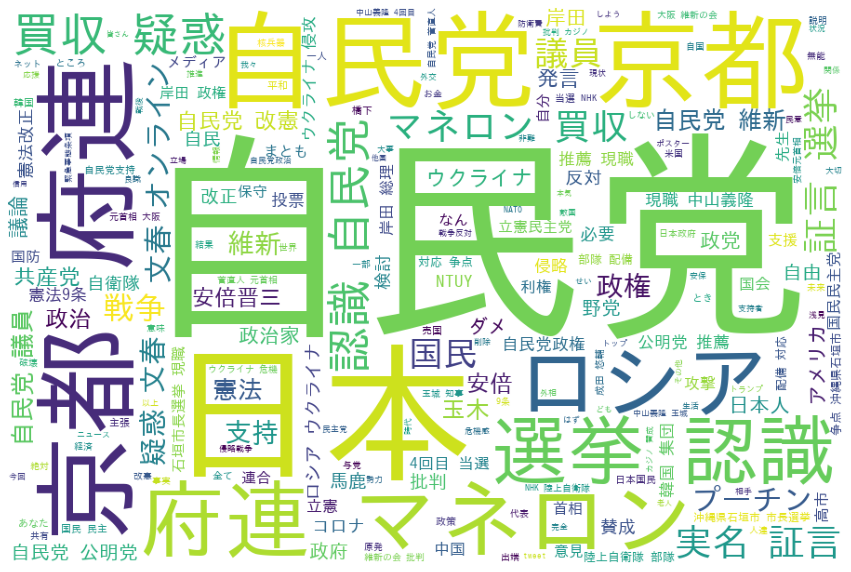

In [48]:
#--> NGワードの駆逐後のワードクラウド
#----> ワードクラウドの表示内容よくなるはず！

# WordCloudで出力するフォントを指定
font_path = "/usr/share/fonts/truetype/fonts-japanese-gothic.ttf"

# ストップワードの設定　※これは検索キーワードによって除外したほうがいい単語を設定
stop_words = [ 'みたい','もの' ,'こと','なのか','あれ', 'あ', 'とか']

#解析単語の指定、ストップワードの設定、背景色は白
wordcloud = WordCloud(background_color="white", font_path=font_path, stopwords=set(stop_words),width=900,height=600).generate(words_text2)

# ワードクラウドを表示
plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## ④ nlplotで、共起ネットワーク

In [49]:
# 保存ファイル名を確認 --> ★Googleドライブでファイルの中身をご確認ください！
%ls

mecab-ipadic-neologd/  sample_data/  tw_all.csv  tw_text_mod.csv


In [50]:
# CSVファイル読み込み（Twitterテキストデータを読み込み！）
df_npt = pd.read_csv('tw_all.csv')

In [51]:
df_npt2 = df.drop(["TW_NO", "USER_NAME", "TW_TIME", "FAV", "RT", "temp", "TW_TEXT"], axis=1)

In [52]:
# df_npt2

In [53]:
# Pandasをリスト化
npt_data = df_npt2['TW_TEXT_mod'].to_list()

In [54]:
# npt_data

In [55]:
# Mecabを使用して、形態素解析
# 形態素解析器: ChaSen、辞書: 新語対応で有名なNeologd
# mecab = MeCab.Tagger("-Ochasen")
mecab =MeCab.Tagger('-Ochasen -d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd')

In [56]:
# 文単位の名詞リスト
npt_words_list=[]

# 文単位の名詞リストを生成
for sentence in npt_data:
    # print(mecab.parse(str(sentence)))
    # print(mecab.parse(str(sentence)).splitlines())

    sw_list = []
    for v in mecab.parse(str(sentence)).splitlines():
        # print(v)
        # print(v.split())
        if (len(v.split())>=3 and v.split()[3][:2]=='名詞'):
            sw_list.append(v.split()[2])
            # print(sw_list)
            
    npt_words_list.append(sw_list)

In [57]:
print(npt_words_list)

[['1次', '産業', '自民党政権', '生活', '地方', '一部', '自民党', 'それ', '邪魔', 'の', 'どこか', '都市部', '自民党支持', '企業', '団体', '自民党', '議員', '企業', '日本', 'しよう'], ['憲法9条', '神体', '老人', 'たち', '綺麗事', '平和', 'ドイツ', '防衛費', '13兆円', 'GDP', '3%', '事', '日本', '5兆円', '大丈夫', '生活', '破壊', 'の', '侵略'], ['ウクライナ', '日本国民', '皆さん', '日米地位協定', '不公平', '協定', '自民党', '安保', '本気', '日本人', 'アメリカ', 'アメリカ', '信用'], ['自民党', '非難', 'お前', '政治家', 'みたい', 'やつ', '橋下徹', 'レベル', 'ん', '最初'], ['壁', '透過', 'レーダー', '現状', '誰', '購入', '使用', '登録制', '規制'], ['居間', '麻生派', '一斉', '退会', '波紋', '背景', '麻生氏', '遺恨', '菅', '氏', '期待', 'TBS', '系', 'JNN', '佐藤', '馬鹿', '麻生', '馬鹿'], ['日本', '他国', 'よう', '憲法改正', 'しよう', '100%', '無理', '緊縮', 'ん', '自民党', '改正', '草案', '中', '財政', '規律', '条項', 'の', '説明', '緊縮', '憲法改正', '防衛力', '一瞬'], ['維新の会', 'ヒトラー', '発言', 'の', '国土交通省', '統計', '不正', '問題', '自民党', 'オーダー', 'ん', 'ん'], ['ベルリン', 'プラハ', 'ロシア', '蹂躙', '東欧', '東ドイツ', 'ウクライナ', '連帯', '欧州', '理解', '日本人', '左翼', '保守', '中', '岩場', '老害'], ['自民党', 'ネット工作員', '話題', 'ネット', '時代', '選挙', 'さ', 'なん'], ['自民党', 'ネット工作員', '話題', 'ネット'

In [59]:
# 適さない単語をリストからカット（★NGワードの駆逐）
npt_words_list2 = []

for l in npt_words_list:
    # print(l)

    w_list = []
    for w in l:
        if w not in ['事', '感じ', 'うた', 'の', 'こと', 'ん', 'これ', 'さん', 'よう', '方', '今', '者', '何', 'ため', '氏', 'それ', '時', '的', 'もの', '中', '為', '内', 'みたい', 'そう', '１', '2', '3', '4', '5', '6', '7', '8', '9', '0', '１', '２', '３', '４', '５', '６', '７', '８', '９', '０', 'ら', '等', 'たち', 'さ', 'そこ']:
            w_list .append(w)
        # print(w_list)
    
    npt_words_list2.append(w_list)

In [60]:
print(npt_words_list2)

[['1次', '産業', '自民党政権', '生活', '地方', '一部', '自民党', '邪魔', 'どこか', '都市部', '自民党支持', '企業', '団体', '自民党', '議員', '企業', '日本', 'しよう'], ['憲法9条', '神体', '老人', '綺麗事', '平和', 'ドイツ', '防衛費', '13兆円', 'GDP', '3%', '日本', '5兆円', '大丈夫', '生活', '破壊', '侵略'], ['ウクライナ', '日本国民', '皆さん', '日米地位協定', '不公平', '協定', '自民党', '安保', '本気', '日本人', 'アメリカ', 'アメリカ', '信用'], ['自民党', '非難', 'お前', '政治家', 'やつ', '橋下徹', 'レベル', '最初'], ['壁', '透過', 'レーダー', '現状', '誰', '購入', '使用', '登録制', '規制'], ['居間', '麻生派', '一斉', '退会', '波紋', '背景', '麻生氏', '遺恨', '菅', '期待', 'TBS', '系', 'JNN', '佐藤', '馬鹿', '麻生', '馬鹿'], ['日本', '他国', '憲法改正', 'しよう', '100%', '無理', '緊縮', '自民党', '改正', '草案', '財政', '規律', '条項', '説明', '緊縮', '憲法改正', '防衛力', '一瞬'], ['維新の会', 'ヒトラー', '発言', '国土交通省', '統計', '不正', '問題', '自民党', 'オーダー'], ['ベルリン', 'プラハ', 'ロシア', '蹂躙', '東欧', '東ドイツ', 'ウクライナ', '連帯', '欧州', '理解', '日本人', '左翼', '保守', '岩場', '老害'], ['自民党', 'ネット工作員', '話題', 'ネット', '時代', '選挙', 'なん'], ['自民党', 'ネット工作員', '話題', 'ネット', '時代', '選挙'], ['70億円', '支援要請', '日本政府', '支援', '人道支援'], ['民主党', '嫌い', '自民党', '右派', '支持', '東

In [61]:
#形態素結果のリスト化＆ストップワードをカットして、データフレームdf_npt2に結果を列追加する
df_npt2['words'] = npt_words_list2

In [62]:
df_npt2

,TW_TEXT_mod,words
0,1次産業で自民党政権になってから生活が一気に苦しくなった地方の一部が自民党から抜け出そうとし始めたそれを邪魔するのはどこかなんと都市部の自民党支持企業、団体自民党議員をのさばらせなければ成り立たない企業ならなくていい少しずつでいい日本をよくしよう,"[1次, 産業, 自民党政権, 生活, 地方, 一部, 自民党, 邪魔, どこか, 都市部, 自民党支持, 企業, 団体, 自民党, 議員, 企業, 日本, しよう]"
1,憲法9条をご神体に祀る、老人たち。いまだに生き延びてる。綺麗事では平和を守れない。ドイツでさえ防衛費を13兆円に、GDP3%に増やす事を決めた。日本は5兆円で大丈夫か？生活を破壊するのは侵略だぞ、わかってる？…,"[憲法9条, 神体, 老人, 綺麗事, 平和, ドイツ, 防衛費, 13兆円, GDP, 3%, 日本, 5兆円, 大丈夫, 生活, 破壊, 侵略]"
2,ウクライナでわかったよね？日本国民の皆さん。日米地位協定なんて不公平な協定はもう見直せよ自民党。安保も本気で日本人なんかは守らんよアメリカわ。それでもアメリカを信用する？,"[ウクライナ, 日本国民, 皆さん, 日米地位協定, 不公平, 協定, 自民党, 安保, 本気, 日本人, アメリカ, アメリカ, 信用]"
3,「自民党を非難するならお前が政治家になって変えればいいだろ」みたいなやつって橋下徹レベルでも言うんだ もしかして最初から言ってた？,"[自民党, 非難, お前, 政治家, やつ, 橋下徹, レベル, 最初]"
4,壁透過レーダーは現状、誰でも買える。購入や使用を登録制にするとか規制を設けなさい。,"[壁, 透過, レーダー, 現状, 誰, 購入, 使用, 登録制, 規制]"
...,...,...
495,橋下さん、知事時代に国政に口出ししてる頃から、この人に外交は、国防は任せられないと、しみじみ思ったものだけど…大阪から一歩出た主張は、とたんにダメダメになるよね…まぁ、大阪での主張も、地元の人にけっこう嫌われてるけど、結局、大阪…,"[橋下, 知事, 時代, 国政, 口出し, 頃, 人, 外交, 国防, 大阪, 一, 歩, 主張, ダメダメ, 大阪, 主張, 地元, 人, 結局, 大阪]"
496,自民党の政治が日本の国土を破壊する。日本の建設業は外国人頼みになっている。外国人にすら見捨てられかけている。澤田晃宏さん。一月万冊清水有高 より,"[自民党, 政治, 日本, 国土, 破壊, 日本, 建設業, 外国, 人頼み, 外国人, 澤田, 晃宏, 一月, 万, 冊, 清水, 有高]"
497,《実名・新証言》「選挙の金だと、もちろん認識していました」自民党京都府連マネロン買収疑惑(文春オンライン),"[実名, 証言, 選挙, 金, 認識, 自民党, 京都, 府連, マネロン, 買収, 疑惑, 文春, オンライン]"
498,《実名・新証言》「選挙の金だと、もちろん認識していました」自民党京都府連マネロン買収疑惑,"[実名, 証言, 選挙, 金, 認識, 自民党, 京都, 府連, マネロン, 買収, 疑惑]"


In [63]:
# nlplotのインストール
!pip install nlplot

In [64]:
import nlplot

In [65]:
# nlplotのインスタンスを生成
npt = nlplot.NLPlot(df_npt2, target_col='words')

In [66]:
# ストップワードの計算
# top_nで頻出上位単語, min_freqで頻出下位単語を指定できる
# 今回は上位2単語（XXX・YYY）をストップワードに指定
# stopwords = npt.get_stopword(top_n=2, min_freq=0)

# 初回は、ストップワーズは設定なし（チャートをチェックして追加する方針）
stopwords = npt.get_stopword(top_n=0, min_freq=0)

## N-gram bar chart

In [67]:
# ngramの引数に与える数値により、いくつ隣り合わせの単語までを考慮するかを指定できる
npt.bar_ngram(
    title='uni-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=1,  #1の場合
    top_n=50,
    stopwords=stopwords,
)

100%|██████████| 500/500 [00:00<00:00, 81027.43it/s]


## co-occurrence networks（共起ネットワーク）

- このネットワークを描画する場合は、事前にビルド処理が必要
- このビルド処理のmin_edge_frequency引数でプロットするノードの数を制限<br />
（指定数以下のエッジ(辺)しか存在しないノードはプロット対象から除外することができます）

In [68]:
# ビルド（データ件数によっては処理に時間を要します）※ノードの数のみ変更
npt.build_graph(stopwords=stopwords, min_edge_frequency=10)

node_size:53, edge_size:125


In [69]:
# ビルド処理で生成されたデータフレーム にもアクセスできる、、
display(
    npt.node_df.head(), npt.node_df.shape,
    npt.edge_df.head(), npt.edge_df.shape
)

,id,id_code,adjacency_frequency,betweeness_centrality,clustering_coefficient,community
0,私,0,1,0.0,0.0,0
1,政党,1,1,0.0,0.0,0
2,維新の会,2,1,0.0,0.0,0
3,野党,3,1,0.0,0.0,0
4,賛成,4,1,0.0,0.0,0


(53, 6)

,source,target,edge_frequency,source_code,target_code
0,日本,自民党,72,35,11
1,自民党,選挙,56,11,38
2,自民党,金,45,11,10
3,府連,選挙,43,47,38
4,マネロン,京都,43,46,9


(125, 5)

In [70]:
# nlplotで共起グラフを作成
npt.co_network(
    title='Co-occurrence network',
)